# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#FAF0EF; font-size:150%; text-align:center; padding:10px; background: #1db5baff; border-radius: 10px; box-shadow: 10px 10px 5px #7abcafff;">🌟 Data Preprocessing  <br></div>

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [9]:
import kagglehub
import pandas as pd
import os

# Download dataset to cache (not project folder)
path = kagglehub.dataset_download("justinas/startup-investments")

# List files to know the exact CSV name
os.listdir(path)


['acquisitions.csv',
 'degrees.csv',
 'funding_rounds.csv',
 'funds.csv',
 'investments.csv',
 'ipos.csv',
 'milestones.csv',
 'objects.csv',
 'offices.csv',
 'people.csv',
 'relationships.csv']

In [10]:
import pandas as pd
import os

objects = pd.read_csv(os.path.join(path, "objects.csv"))
funding = pd.read_csv(os.path.join(path, "funding_rounds.csv"))
investments = pd.read_csv(os.path.join(path, "investments.csv"))
ipos = pd.read_csv(os.path.join(path, "ipos.csv"))
acq = pd.read_csv(os.path.join(path, "acquisitions.csv"))
offices = pd.read_csv(os.path.join(path, "offices.csv"))


C:\Users\Amira\AppData\Local\Temp\ipykernel_8836\3865358063.py:4: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects = pd.read_csv(os.path.join(path, "objects.csv"))


In [11]:
companies = objects[objects["entity_type"] == "Company"].copy()

In [12]:
funding_agg = funding.groupby("object_id").agg(
    total_funding_usd=("raised_amount_usd", "sum"),
    nb_funding_rounds=("funding_round_id", "count")
).reset_index()

companies = companies.merge(
    funding_agg,
    left_on="id",        
    right_on="object_id",
    how="left"
)

# NaN → 0
companies["total_funding_usd"] = companies["total_funding_usd"].fillna(0)
companies["nb_funding_rounds"] = companies["nb_funding_rounds"].fillna(0)


In [13]:
investor_agg = investments.groupby("funded_object_id").agg(
    nb_investors=("investor_object_id", "nunique")
).reset_index()

companies = companies.merge(
    investor_agg,
    left_on="id",               # id من companies
    right_on="funded_object_id",  # العمود الصحيح من investments
    how="left"
)


companies["nb_investors"] = companies["nb_investors"].fillna(0)


In [14]:
ipos["ipo"] = 1   
ipos = ipos.rename(columns={"object_id": "company_object_id"})

companies = companies.merge(
    ipos[["company_object_id", "ipo"]],
    left_on="id",
    right_on="company_object_id",
    how="left"
)

companies["ipo"] = companies["ipo"].fillna(0)


In [15]:
acq["acquired"] = 1
acq = acq.rename(columns={"acquired_object_id": "company_object_id"})

companies = companies.merge(
    acq[["company_object_id", "acquired"]],
    left_on="id",
    right_on="company_object_id",
    how="left"
)

companies["acquired"] = companies["acquired"].fillna(0)


In [16]:
office_agg = offices.groupby("object_id").agg(
    nb_offices=("office_id", "count"),
    country=("country_code", "first")
).reset_index().rename(columns={"object_id": "company_object_id"})

companies = companies.merge(
    office_agg,
    left_on="id",
    right_on="company_object_id",
    how="left"
)

companies["nb_offices"] = companies["nb_offices"].fillna(0)
companies["country"] = companies["country"].fillna("Unknown")

In [17]:
 import pandas as pd

def explore_dataframe(df):
    """
    Simple function to explore a DataFrame
    Shows dtypes, info, and describe
    """
    
    print("===== Data Types =====")
    print(df.dtypes)  # print the type of each column
    
    print("\n===== Info =====")
    print(df.info())  # print general info of the DataFrame
    
    print("\n===== Describe =====")
    print(df.describe())  # print statistics of numeric columns


In [10]:
explore_dataframe(companies)

===== Data Types =====
id                      object
entity_type             object
entity_id                int64
parent_id               object
name                    object
normalized_name         object
permalink               object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
homepage_url            object
twitter_username        object
logo_url                object
logo_width               int64
logo_height              int64
short_description       object
description             object
overview                object
tag_list                object
country_code            object
state_code              object
city                    object
region                  object
first_investment_at     object
last_investment_at      object
investment_rounds        int64
invested_companies       int64
first_funding_at        object
last_funding_at         object
funding_rounds  

In [18]:
#  Remove duplicates
companies = companies.drop_duplicates()

# 2️⃣ Fill missing values

In [19]:
import pandas as pd

def get_numeric_columns(df):
    """
    Get numeric columns from a DataFrame
    """
    numeric_cols = df.select_dtypes(include="number").columns.tolist()  # select numeric columns
    return numeric_cols


In [20]:
numeric_cols = get_numeric_columns(companies)
print("Numeric columns:", numeric_cols)


Numeric columns: ['entity_id', 'logo_width', 'logo_height', 'investment_rounds', 'invested_companies', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'total_funding_usd', 'nb_funding_rounds', 'nb_investors', 'ipo', 'acquired', 'nb_offices']


In [21]:
def get_categorical_columns(df):
    """
    Get categorical (non-numeric) columns from a DataFrame
    """
    categorical_cols = df.select_dtypes(exclude="number").columns.tolist()  # select non-numeric columns
    return categorical_cols


In [22]:
categorical_cols = get_categorical_columns(companies)
print("Categorical columns:", categorical_cols)


Categorical columns: ['id', 'entity_type', 'parent_id', 'name', 'normalized_name', 'permalink', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'short_description', 'description', 'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region', 'first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at', 'created_by', 'created_at', 'updated_at', 'object_id', 'funded_object_id', 'company_object_id_x', 'company_object_id_y', 'company_object_id', 'country']


In [23]:
#   Handle missing values
# ===============================
# Numeric columns → fill with 0
companies[numeric_cols] = companies[numeric_cols].fillna(0)

# Categorical columns → fill with "Unknown"
companies[categorical_cols] = companies[categorical_cols].fillna("Unknown")

# 4️⃣ Encode categorical features

In [24]:
# 4️⃣ Encode categorical features
# ===============================
for col in categorical_cols:
    le = LabelEncoder()
    companies[col + "_encoded"] = le.fit_transform(companies[col])



In [25]:
# ===============================
# 5️⃣ Scale numeric features
# ===============================
scaler = StandardScaler()
companies[numeric_cols] = scaler.fit_transform(companies[numeric_cols])



In [26]:
# ===============================
# 6️⃣ Select final features for model
# ===============================
feature_cols = numeric_cols + [col + "_encoded" for col in categorical_cols]
X = companies[feature_cols]


In [27]:

# Example target → we can predict total_funding_usd
y = companies["total_funding_usd"]

# ===============================
# 7️⃣ Check processed data
# ===============================
print(X.head())
print(y.head())

   entity_id  logo_width  logo_height  investment_rounds  invested_companies  \
0  -1.696119    0.287439    -0.259511          -0.021968           -0.021744   
1  -1.696019   -0.142346    -0.145842          -0.021968           -0.021744   
2  -1.695021   -0.300267    -0.332847          -0.021968           -0.021744   
3  -1.585276   -0.514160    -0.457517          -0.021968           -0.021744   
4  -1.585265   -0.114360    -0.186176          -0.021968           -0.021744   

   funding_rounds  funding_total_usd  milestones  relationships  \
0        3.510874           1.446097    6.316974       2.012052   
1       -0.344045          -0.080707   -0.796037       0.548110   
2       -0.344045          -0.080707    4.894372       1.346624   
3       -0.344045          -0.080707   -0.796037      -0.250404   
4       -0.344045          -0.080707   -0.796037      -0.250404   

   total_funding_usd  ...  last_milestone_at_encoded  created_by_encoded  \
0           1.446097  ...               

# Exploratory Data Analysis

ValueError: num must be an integer with 1 <= num <= 6, not 7

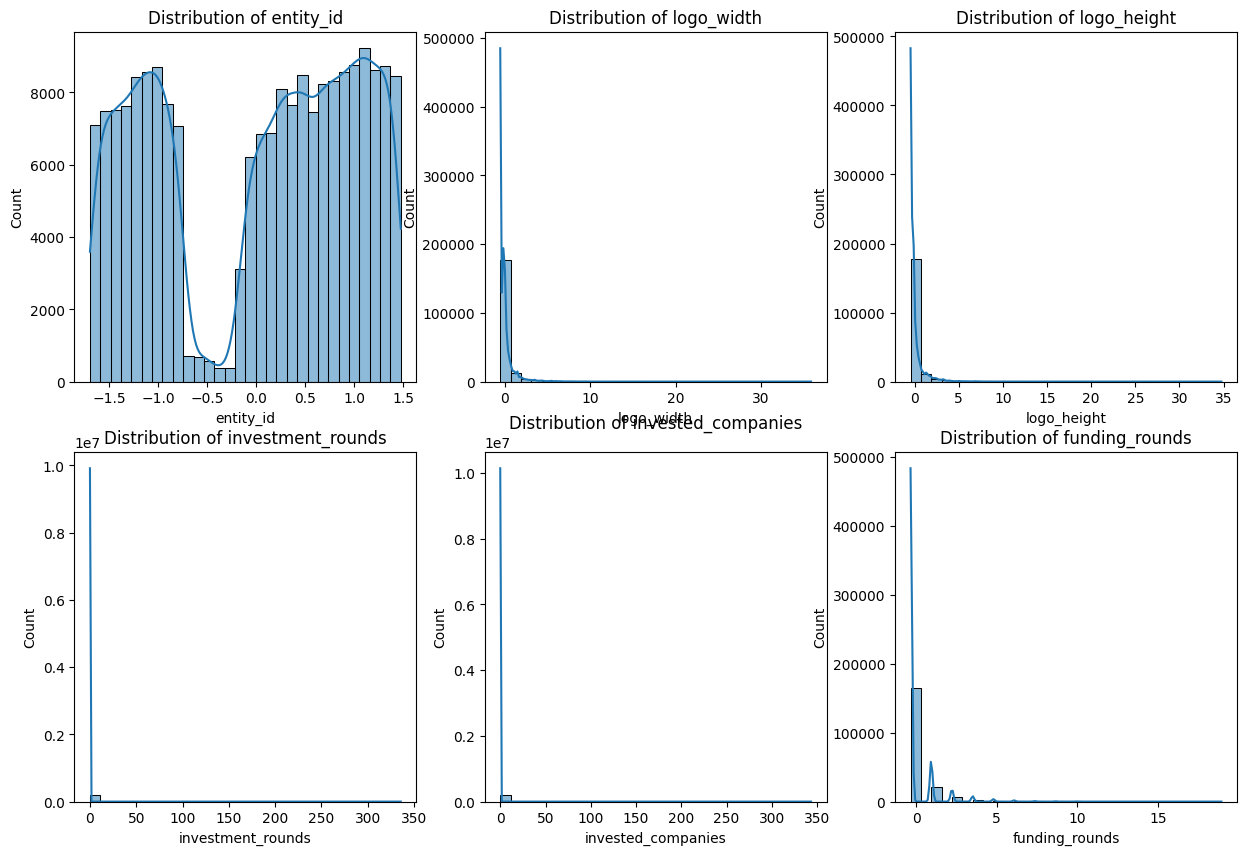

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1️⃣ Numeric columns distribution
# ===============================
numeric_cols = get_numeric_columns(companies)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(companies[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()





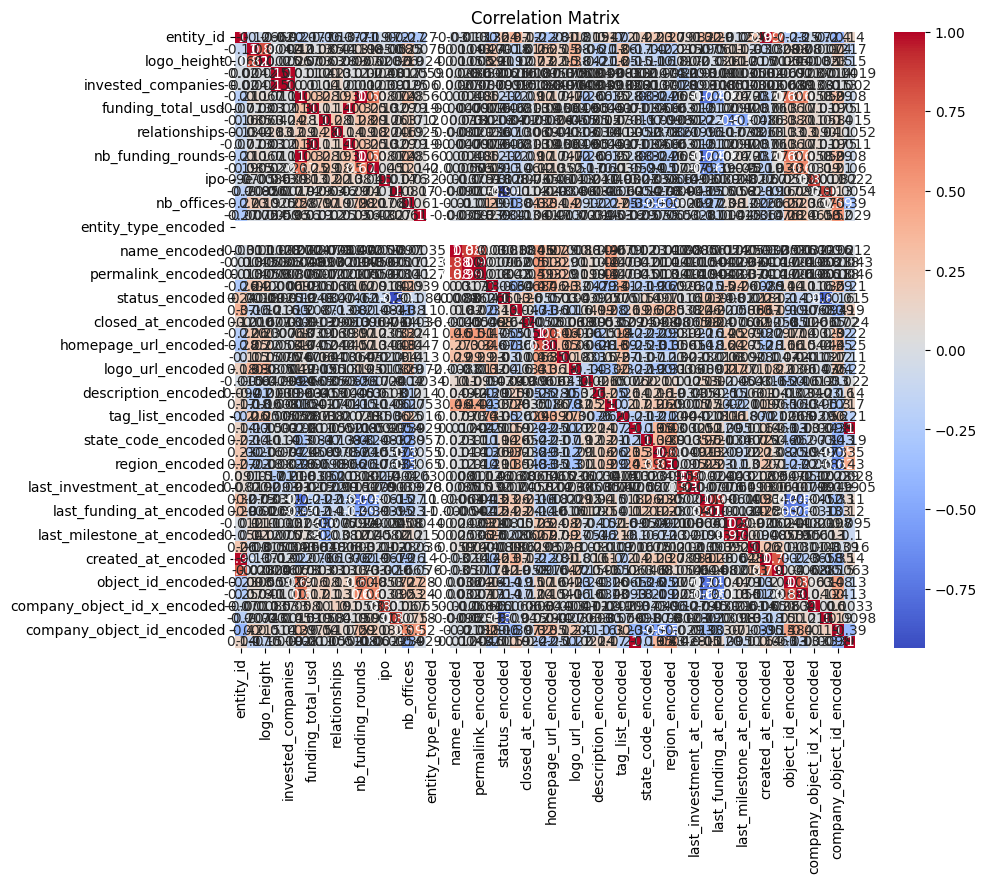

In [24]:
# ===============================
# 2️⃣ Correlation matrix
# ===============================
corr = companies[numeric_cols].corr()  # correlation between numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


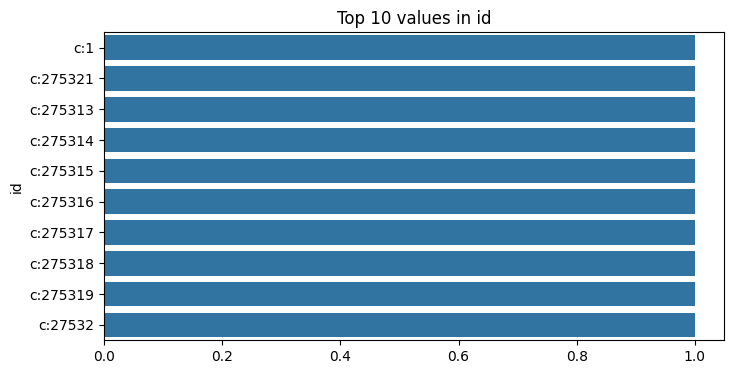

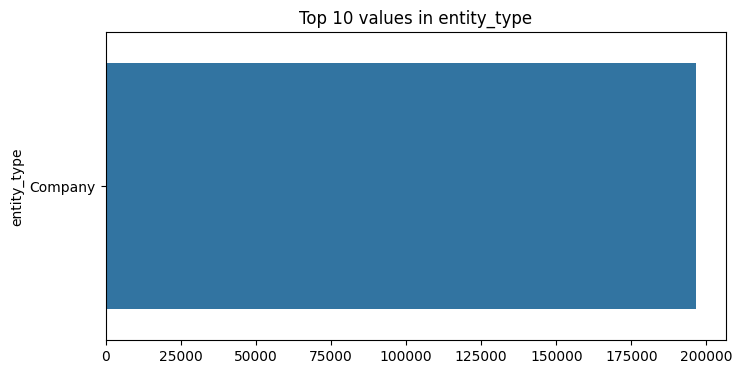

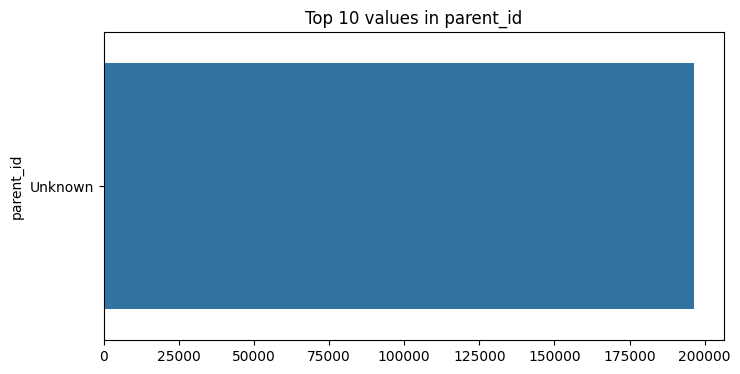

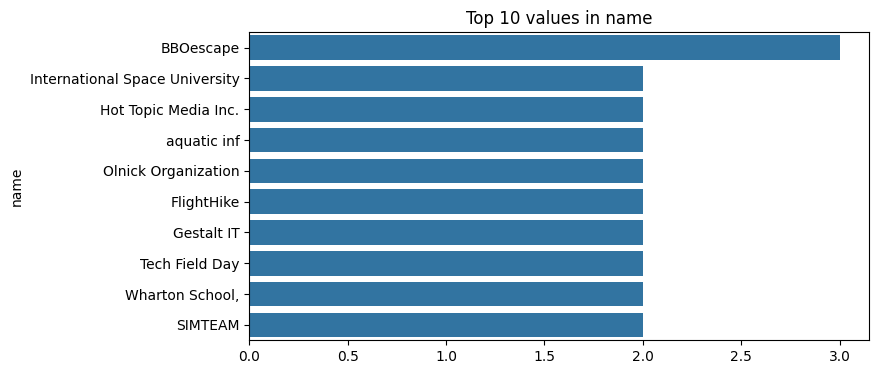

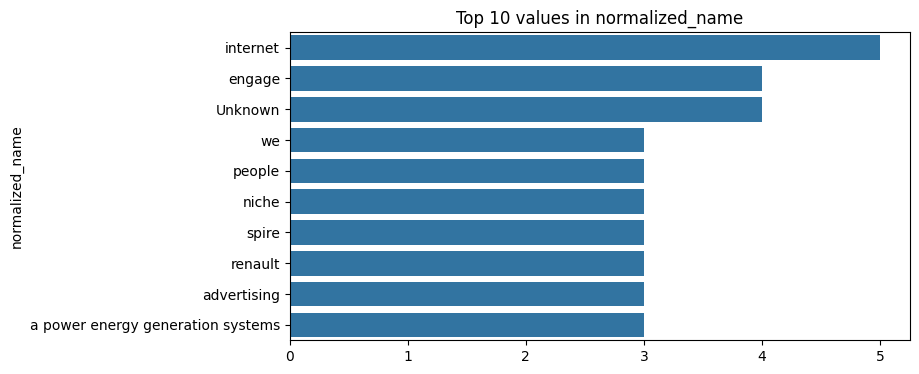

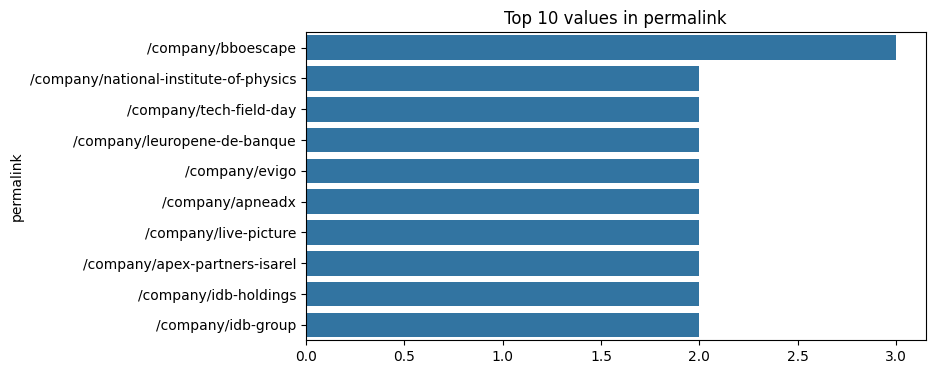

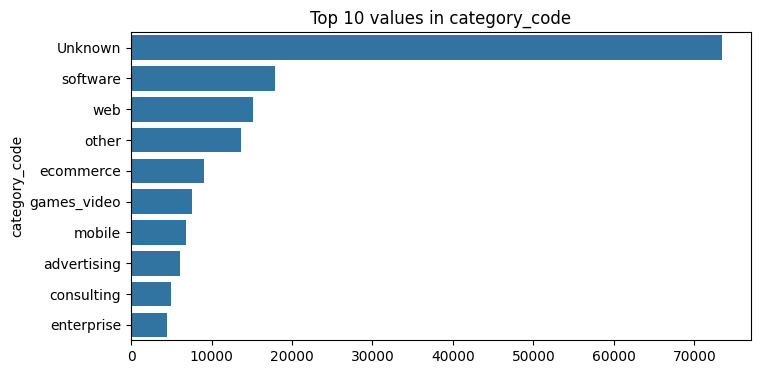

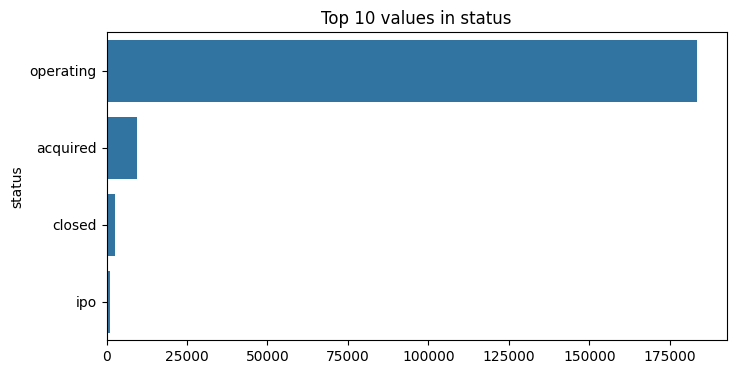

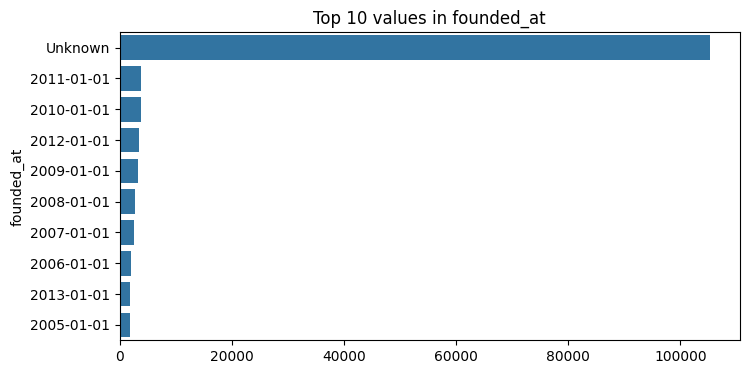

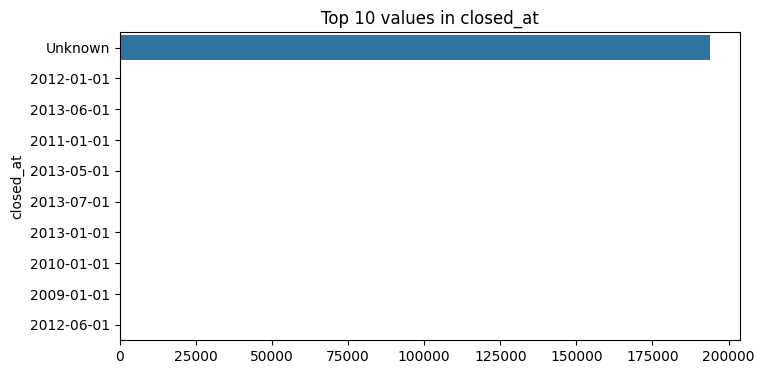

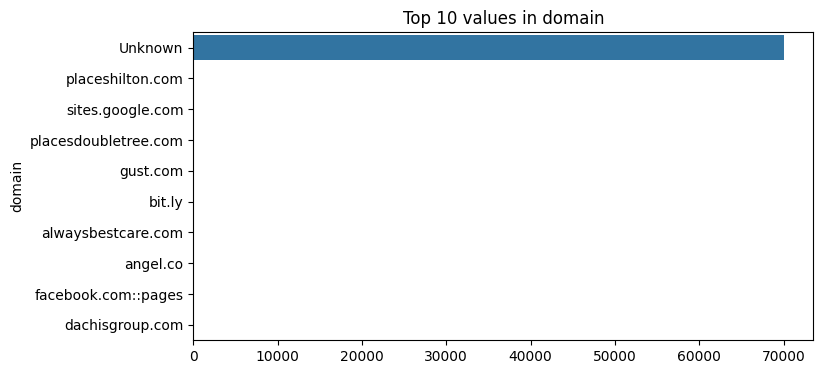

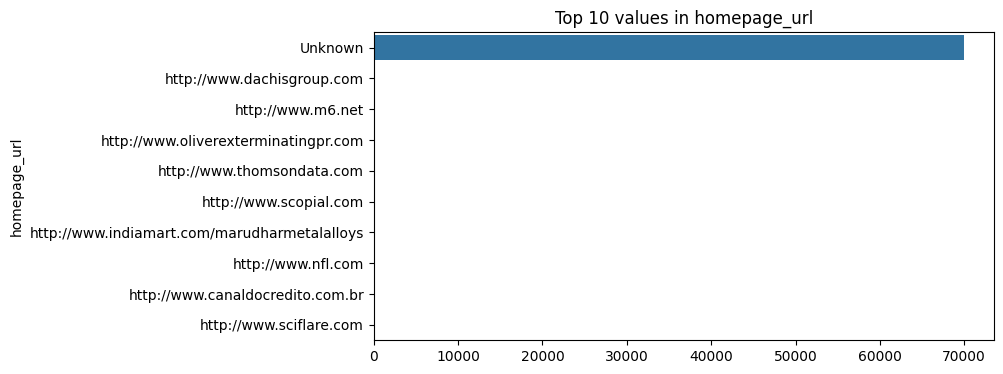

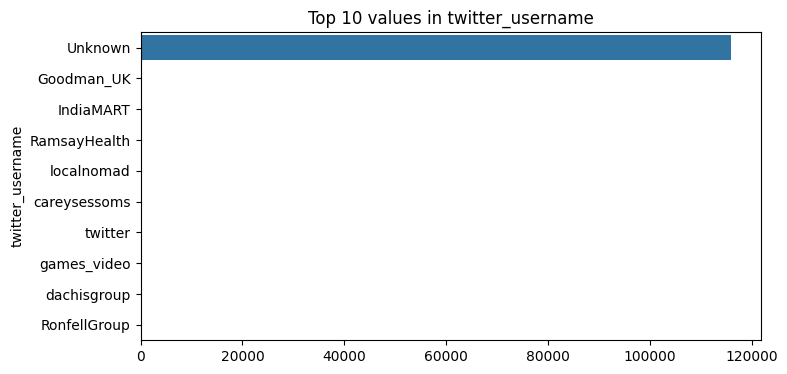

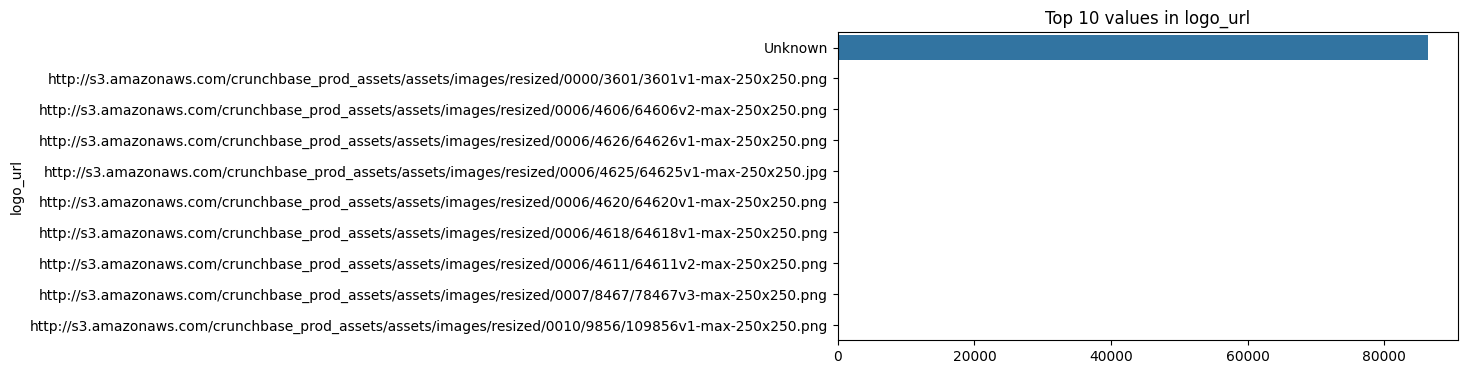

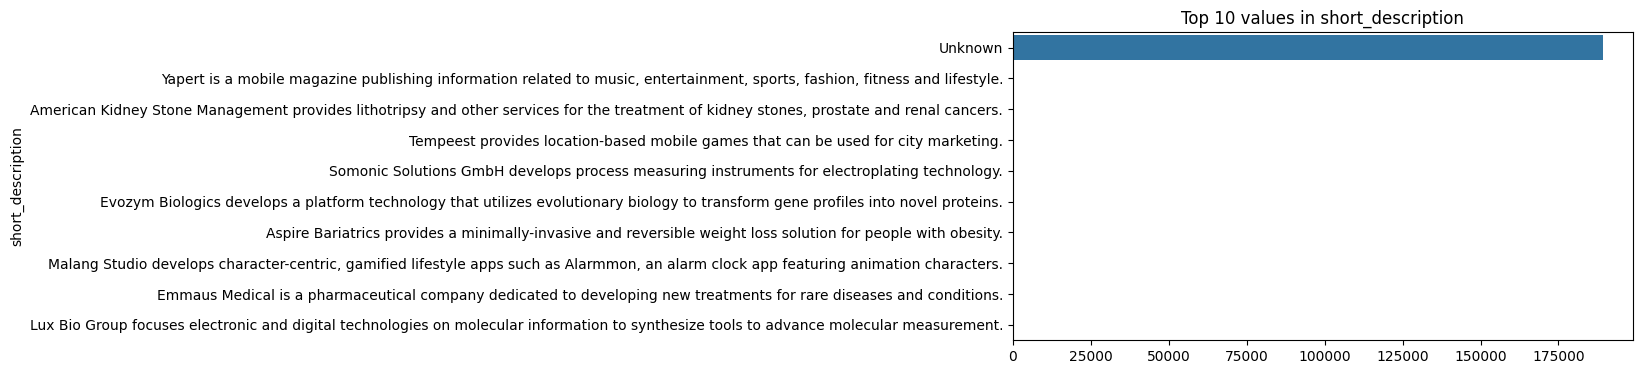

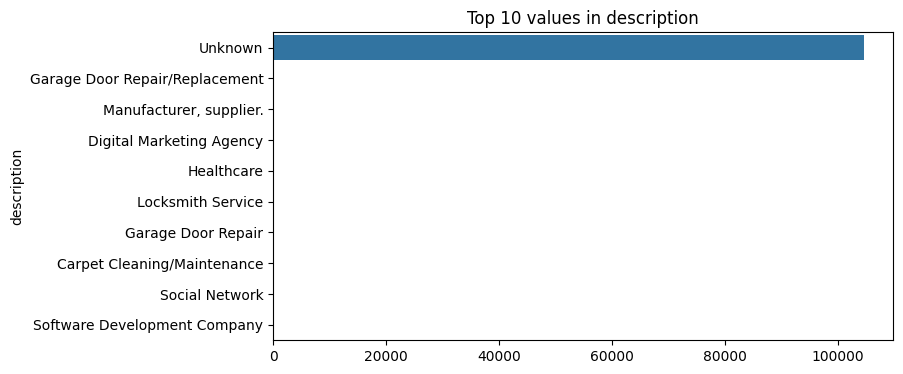

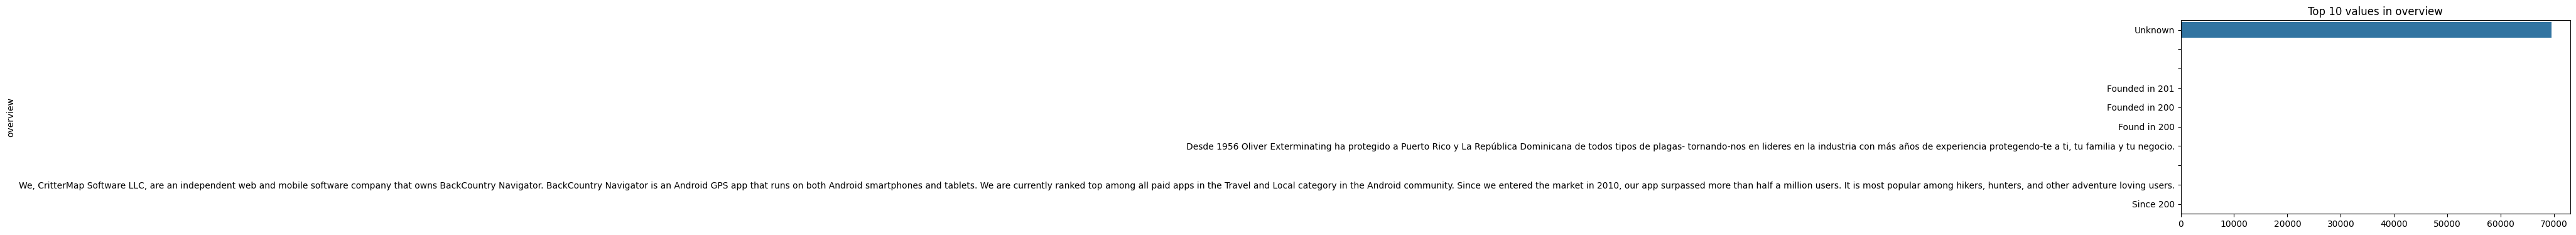

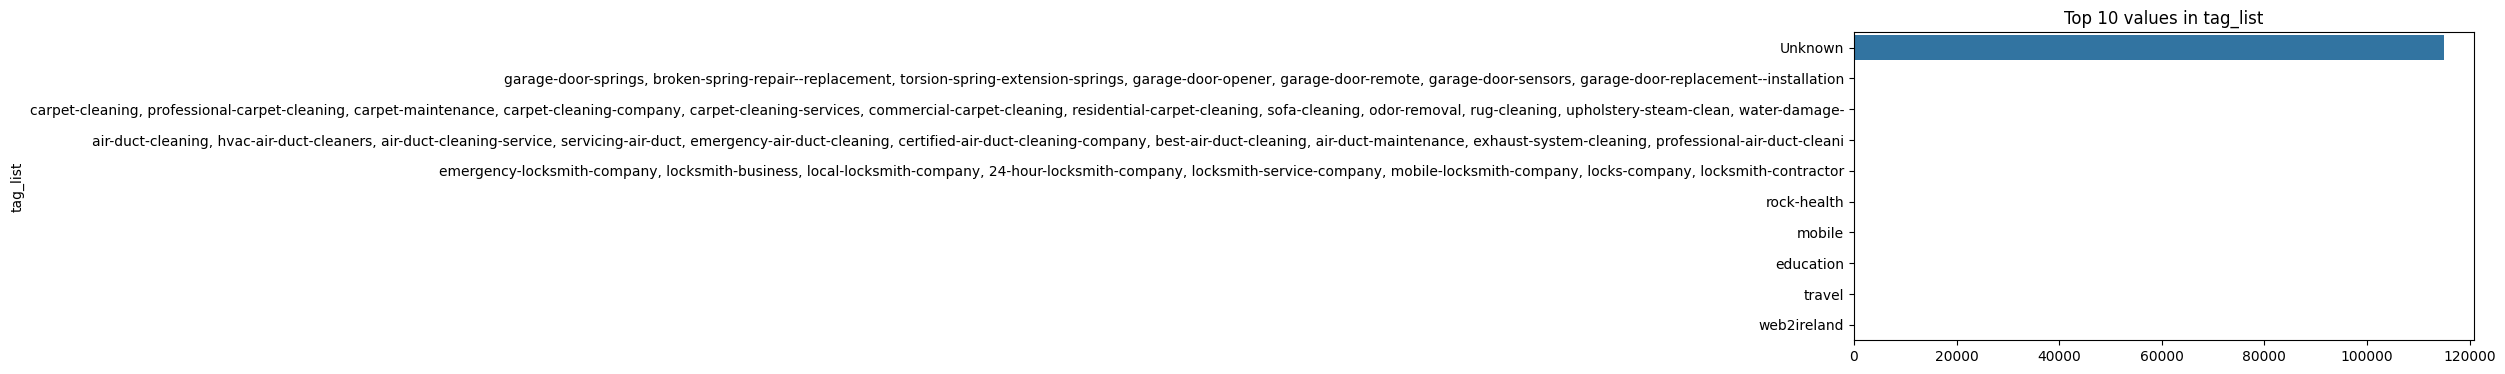

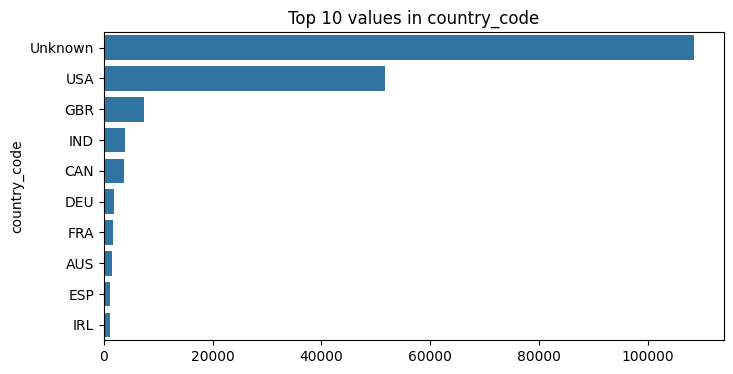

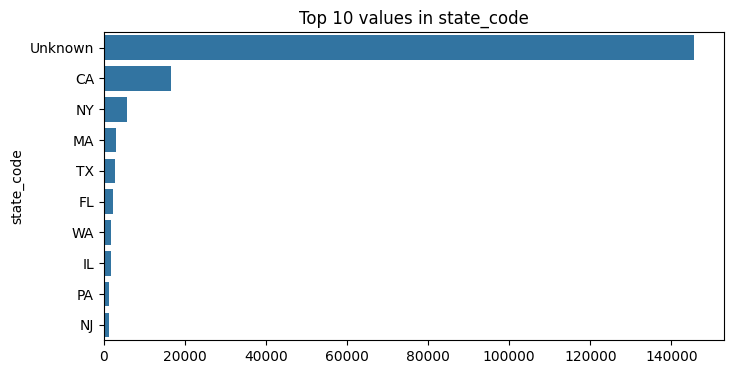

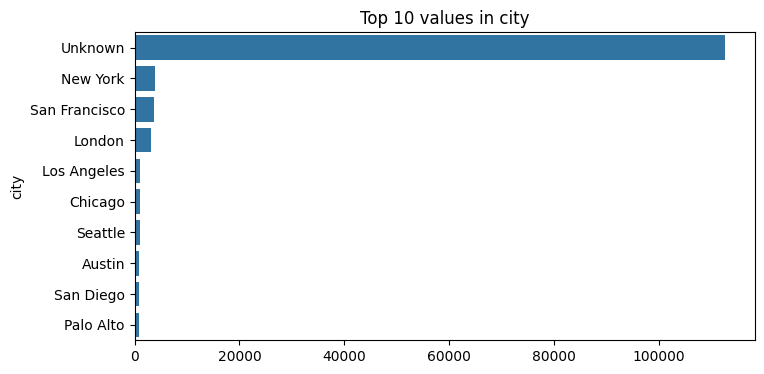

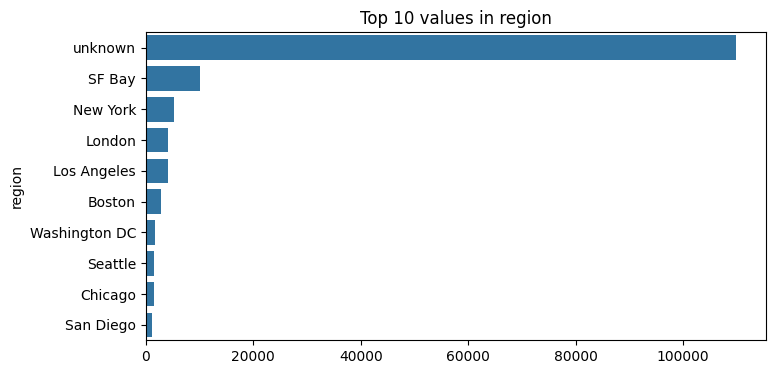

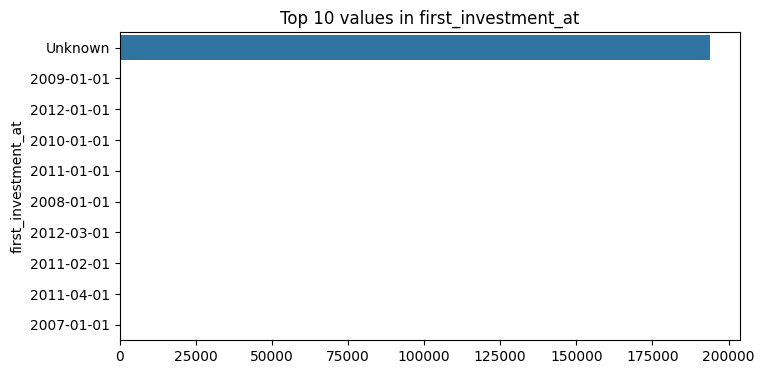

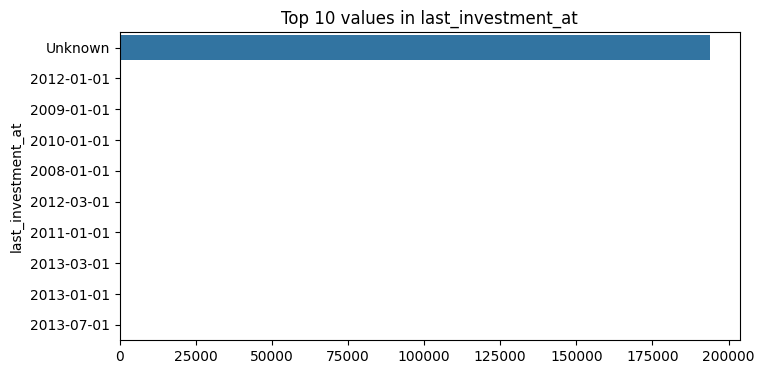

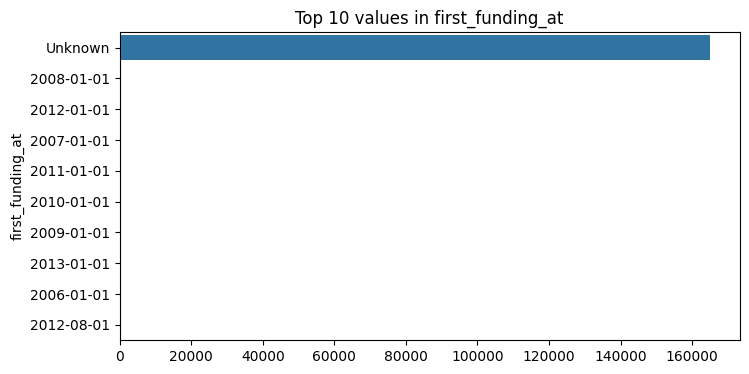

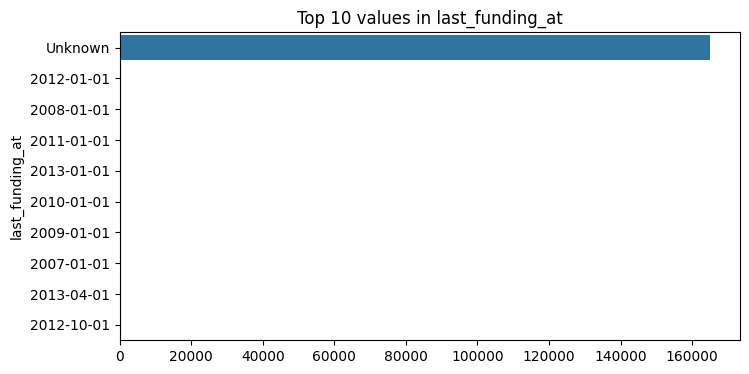

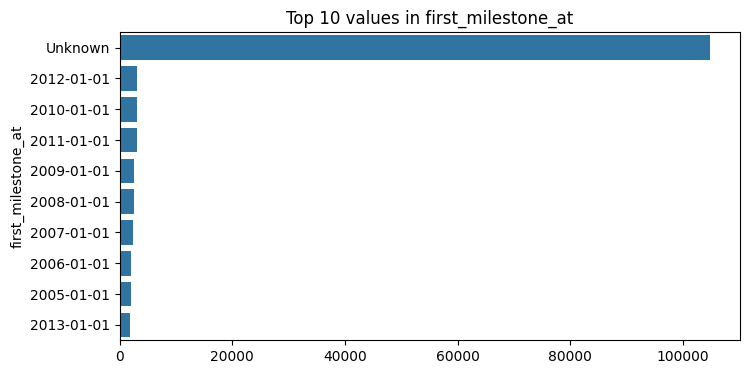

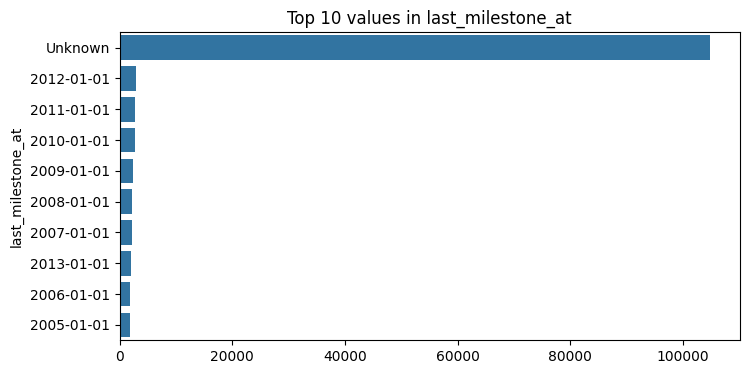

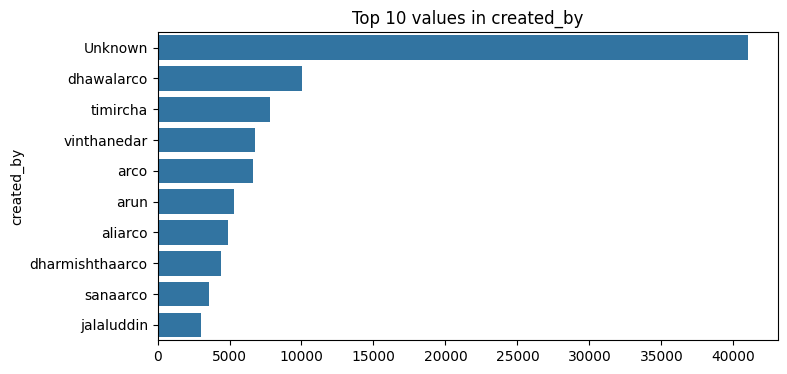

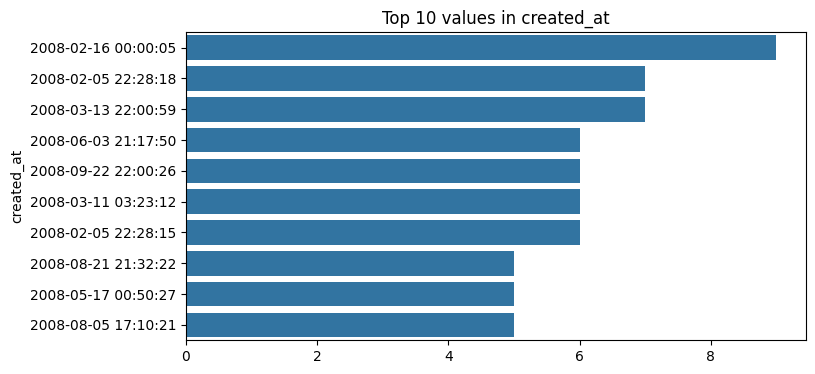

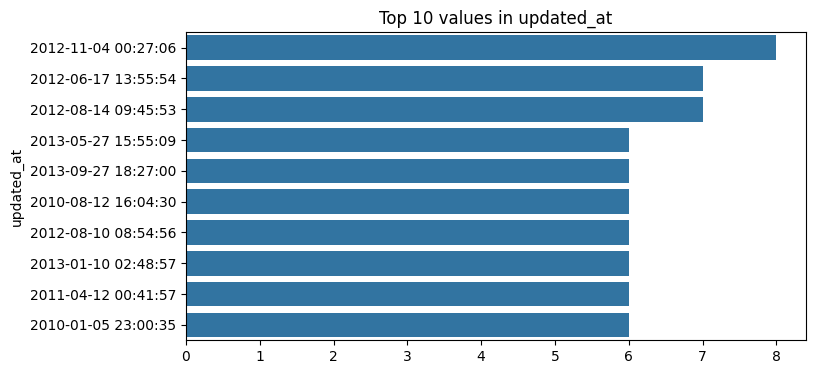

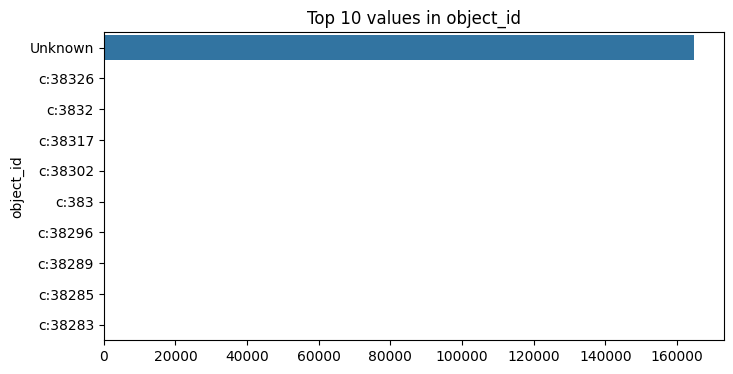

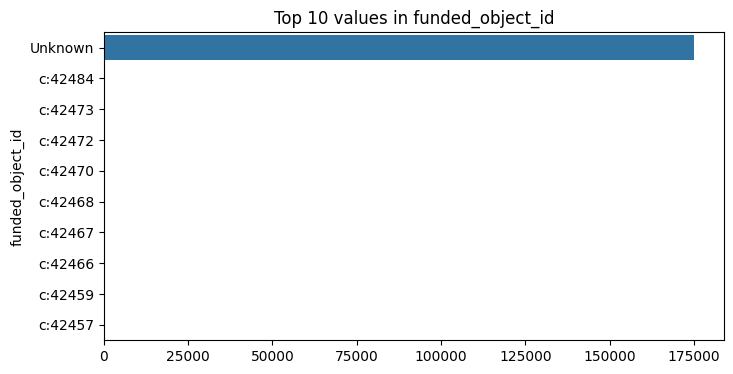

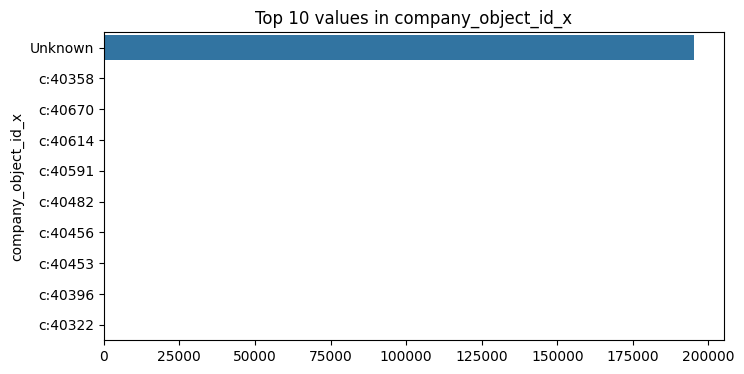

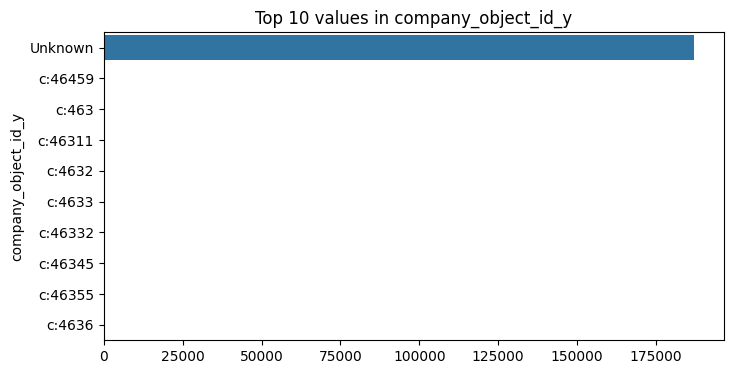

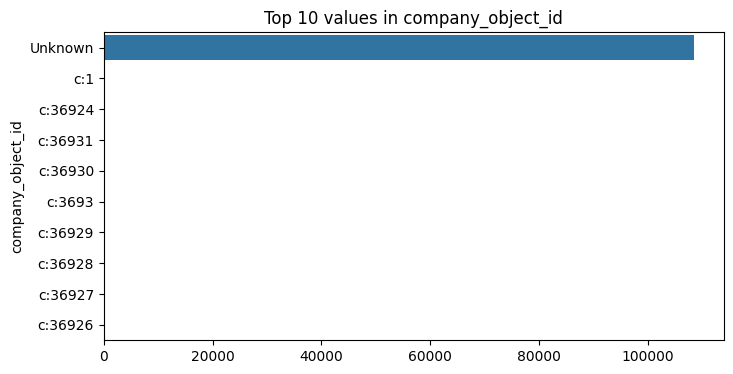

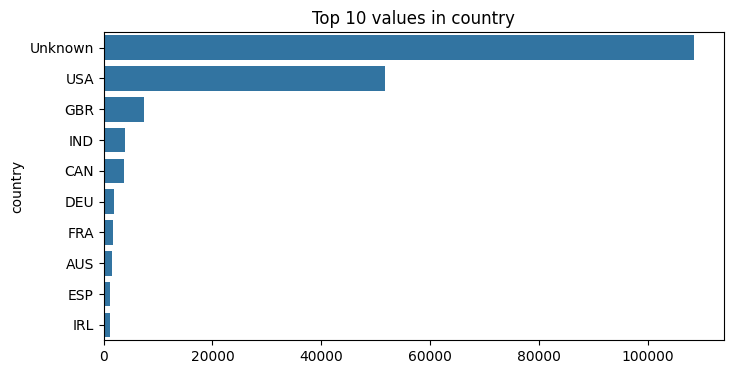

In [25]:

# ===============================
# 3️⃣ Bar plots for categorical features
# ===============================
categorical_cols = get_categorical_columns(companies)

# Show top 10 values for each categorical feature
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    top_values = companies[col].value_counts().head(10)
    sns.barplot(x=top_values.values, y=top_values.index)
    plt.title(f"Top 10 values in {col}")
    plt.show()


In [26]:

# ===============================
# 4️⃣ Feature importance insight (simple correlation with target)
# ===============================
target = "total_funding_usd"
feature_corr = companies[numeric_cols].corrwith(companies[target]).sort_values(ascending=False)
print("Correlation of numeric features with target:")
print(feature_corr)

Correlation of numeric features with target:
funding_total_usd              1.000000
total_funding_usd              1.000000
funding_rounds                 0.299679
nb_funding_rounds              0.299679
nb_investors                   0.249917
funded_object_id_encoded       0.166753
object_id_encoded              0.163639
relationships                  0.139973
ipo                            0.133425
milestones                     0.113624
company_object_id_x_encoded    0.100886
nb_offices                     0.079496
company_object_id_encoded      0.075140
homepage_url_encoded           0.045285
domain_encoded                 0.038856
acquired                       0.029039
id_encoded                     0.018943
company_object_id_y_encoded    0.018513
category_code_encoded          0.015578
logo_width                     0.013456
updated_at_encoded             0.012517
investment_rounds              0.012317
last_milestone_at_encoded      0.012219
invested_companies             0.01

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# Select useful features only

In [28]:
selected_features = [
    "nb_funding_rounds",
    "nb_investors",
    "nb_offices",
    "ipo",
    "acquired",
    "milestones",
    "relationships",
    "funding_rounds"
]

In [29]:
# Select useful features only
selected_features = [
    "nb_funding_rounds",
    "nb_investors",
    "nb_offices",
    "ipo",
    "acquired",
    "milestones",
    "relationships",
    "funding_rounds"
]

# Create X and y
X = companies[selected_features]
y = companies["total_funding_usd"]

# Check data
print(X.head())
print(y.head())


   nb_funding_rounds  nb_investors  nb_offices       ipo  acquired  \
0           3.510874      2.731981    1.916627 -0.079615 -0.224037   
1          -0.344045     -0.241864    0.621932 -0.079615  4.463547   
2          -0.344045     -0.241864    0.621932 -0.079615  4.463547   
3          -0.344045     -0.241864   -0.672764 -0.079615 -0.224037   
4          -0.344045     -0.241864   -0.672764 -0.079615 -0.224037   

   milestones  relationships  funding_rounds  
0    6.316974       2.012052        3.510874  
1   -0.796037       0.548110       -0.344045  
2    4.894372       1.346624       -0.344045  
3   -0.796037      -0.250404       -0.344045  
4   -0.796037      -0.250404       -0.344045  
0    1.446097
1   -0.080707
2   -0.080707
3   -0.080707
4   -0.080707
Name: total_funding_usd, dtype: float64


In [4]:
selected_features = [
    "nb_funding_rounds",
    "nb_investors",
    "nb_offices",
    "ipo",
    "acquired",
    "milestones",
    "relationships",
    "funding_rounds"
]

In [5]:
import json
# Save to JSON
with open("feature_cols.json", "w") as f:
    json.dump(selected_features, f)

print("Feature columns saved to feature_cols.json")

Feature columns saved to feature_cols.json


# Model Training

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [32]:
import numpy as np

In [33]:
y = np.log1p(companies["funding_total_usd"])


In [36]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=400
)


## Regression Models (classical ML)

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

def train_and_compare_regression_models(X_train, X_test, y_train, y_test):
    # Create models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.01),
        "Random Forest": RandomForestRegressor(
            n_estimators=100,
            random_state=42
        )
    }

    results = []

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predict test data
        y_pred = model.predict(X_test)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Save results
        results.append({
            "Model": name,
            "RMSE": rmse,
            "R2": r2
        })

    return pd.DataFrame(results)


In [44]:
results = train_and_compare_regression_models(
    X_train, X_test, y_train, y_test
)

results.sort_values("RMSE")



,Model,RMSE,R2
1,Ridge,0.145260,0.457756
0,Linear Regression,0.145261,0.457753
3,Random Forest,0.145849,0.453353
2,Lasso,0.145905,0.452934


In [38]:
results = train_and_compare_regression_models(
    X_train, X_test, y_train, y_test
)

results.sort_values("RMSE")


,Model,RMSE,R2
2,Lasso,0.640876,0.172289
1,Ridge,0.642326,0.168541
0,Linear Regression,0.642329,0.168533
3,Random Forest,0.816497,-0.343503


Ridge Regression

## Deep Learning

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
#   Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
import pickle

# Sauvegarder le scaler
with open("mlp_model_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler sauvegardé dans mlp_model_scaler.pkl !")


Scaler sauvegardé dans mlp_model_scaler.pkl !


In [48]:

#  Define the MLP model
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # regression output
])


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
#   Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#   Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - loss: 0.0250 - mae: 0.0496 - val_loss: 0.0186 - val_mae: 0.0443
Epoch 2/100
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 48s 12ms/step - loss: 0.0204 - mae: 0.0401 - val_loss: 0.0186 - val_mae: 0.0365
Epoch 3/100
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - loss: 0.0197 - mae: 0.0384 - val_loss: 0.0186 - val_mae: 0.0361
Epoch 4/100
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - loss: 0.0194 - mae: 0.0381 - val_loss: 0.0179 - val_mae: 0.0324
Epoch 5/100
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - loss: 0.0192 - mae: 0.0361 - val_loss: 0.0181 - val_mae: 0.0346
Epoch 6/100
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 75s 19ms/step - loss: 0.0192 - mae: 0.0364 - val_loss: 0.0186 - val_mae: 0.0374
Epoch 7/100
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - loss: 0.0203 - mae: 0.0373 - val_loss: 0.0180 - val_mae: 0.0380
Epoch 8/100
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - loss: 0.0194 - mae: 0.0362 - val_loss: 0.0182 - val_mae: 0.0429
Epoch 9/100
3932/3

In [50]:




#   Evaluate the model
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)



1229/1229 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [51]:
print(f"MLP RMSE: {rmse:.4f}")
print(f"MLP R2: {r2:.4f}")

MLP RMSE: 0.1359
MLP R2: 0.5251


# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#FAF0EF; font-size:150%; text-align:center; padding:10px; background: rgb(70, 162, 198); border-radius: 10px; box-shadow: 10px 10px 5px rgb(82, 130, 192);">🌟 pickle <br></div>

In [52]:
# Save the entire model (architecture + weights + optimizer state)
model.save("mlp_funding_model.h5")
print("MLP model saved as mlp_funding_model.h5")


MLP model saved as mlp_funding_model.h5


In [55]:
# Save weights with correct extension
model.save_weights("mlp_model.weights.h5")
print("Weights saved successfully!")


Weights saved successfully!


In [57]:
import pickle
import json

# Save architecture
model_json = model.to_json()
with open("mlp_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save weights with correct name
model.save_weights("mlp_model.weights.h5")

# Save paths with Pickle
pickle_data = {
    "architecture_file": "mlp_model_architecture.json",
    "weights_file": "mlp_model.weights.h5"
}

with open("mlp_model_pickle.pkl", "wb") as f:
    pickle.dump(pickle_data, f)

print("MLP model saved via Pickle workaround!")


MLP model saved via Pickle workaround!


# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#FAF0EF; font-size:150%; text-align:center; padding:10px; background: rgb(70, 162, 198); border-radius: 10px; box-shadow: 10px 10px 5px rgb(82, 130, 192);">🌟 capture <br></div>

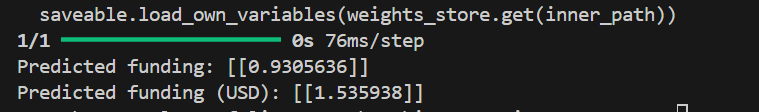

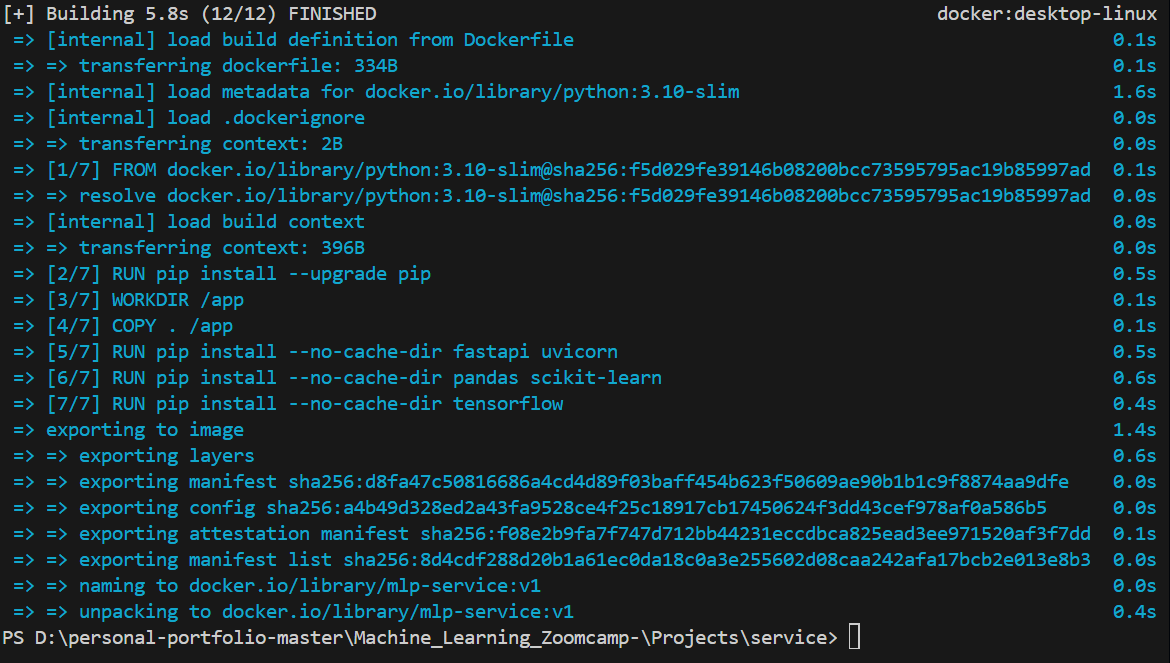

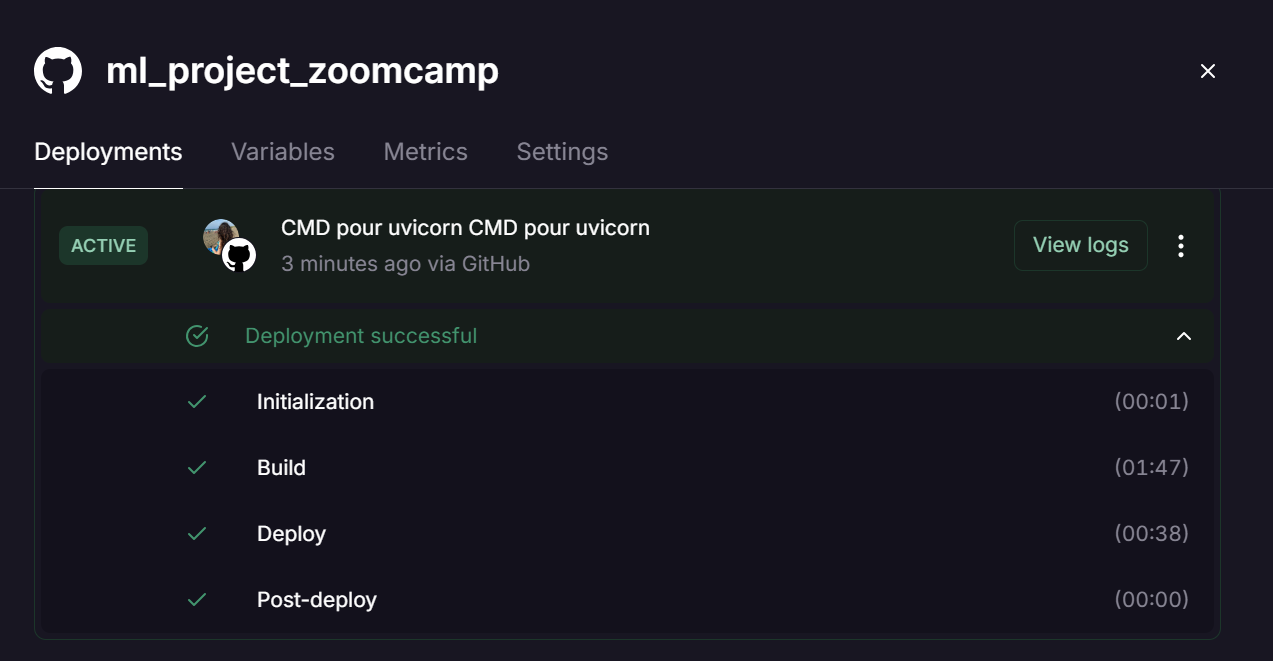